In [29]:
import requests
import pandas as pd

dataset_id = "e9e2dbfc-b3e8-4a22-ba4b-58b949f13644" 
url = f"https://data.cms.gov/data-api/v1/dataset/{dataset_id}/data"

all_records =[]
offset = 0
page_size = 5000

print ('starting full data harvest .. ')

while True:
    params  = {
        "size": page_size,
        "offset": offset
    }

    response = requests.get(url, params = params)

    if response.status_code !=200:
        print(f"Error: server returned status = {response.status_code}")
        break

    data = response.json()

    if not data:
        print(f"\nHarvest complete! total records retrieved {len(all_records)}")
        break

    all_records.extend(data)
    print(f"Retrieved rows {offset} to {offset + len(data)}", end = "\r")

    offset += page_size

df = pd.DataFrame(all_records)


starting full data harvest .. 
Retrieved rows 915000 to 917551
Harvest complete! total records retrieved 917551


In [32]:
unique_services = df['type_of_service'].unique()
print('available type of services')
for service in unique_services:
    print(f" -{service}")

available type of services
 -Ambulance (Emergency & Non-Emergency)
 -Ambulance (Emergency)
 -Ambulance (Non-Emergency)
 -Cardiac Rehabilitation Program
 -Chiropractic Services
 -Clinical Laboratory (Billing Independently)
 -Dialysis
 -Endocrinology
 -Federally Qualified Health Center (FQHC)
 -Home Health
 -Hospice
 -Independent Diagnostic Testing Facility Pt A
 -Independent Diagnostic Testing Facility Pt B
 -Long-Term Care Hospitals
 -Neurology
 -Ophthalmology
 -Physical & Occupational Therapy
 -Podiatry Services
 -Preventive Health Services
 -Psychotherapy
 -Pulmonology
 -Skilled Nursing Facility
 -Telemedicine


In [160]:
dataset_id = "8900b9c5-50b7-43de-9bdd-0d7113a8355e" 
url = f"https://data.cms.gov/data-api/v1/dataset/{dataset_id}/data"

all_data = []
offset = 0
size = 5000

while True:
    params = {
        "filter[state]": "GA",
        "filter[year-filter][condition][path]": "reference_period",
        "filter[year-filter][condition][operator]" : "=",
        "filter[year-filter][condition][value]": "2023-01-01 to 2023-12-31",
        'offset' : offset,
        'size' : size
    }
    
    response = requests.get(url, params = params)
    data = response.json()

    if not data:
        break

    all_data.extend(data)
    print(f'retrieve data rows {offset} up to {len(all_data)}')
    offset += len(data)

df = pd.DataFrame(all_data)

print(df[['state', 'county', 'type_of_service', 'number_of_providers', 'number_of_users', 'percentage_of_dual_eligible_users_out_of_dual_eligible_ffs_beneficiaries']].head(5))
      

retrieve data rows 0 up to 3270
  state    county                        type_of_service number_of_providers  \
0    GA   --ALL--  Ambulance (Emergency & Non-Emergency)                 220   
1    GA   APPLING  Ambulance (Emergency & Non-Emergency)                   6   
2    GA  ATKINSON  Ambulance (Emergency & Non-Emergency)                   1   
3    GA     BACON  Ambulance (Emergency & Non-Emergency)                   4   
4    GA     BAKER  Ambulance (Emergency & Non-Emergency)                   1   

  number_of_users  \
0         105,767   
1             214   
2              53   
3             152   
4              28   

  percentage_of_dual_eligible_users_out_of_dual_eligible_ffs_beneficiaries  
0                                             20.18%                        
1                                             19.12%                        
2                                                                           
3                                             18.71%

In [163]:
column_list = df.columns.tolist()
column_list

['reference_period',
 'type_of_service',
 'aggregation_level',
 'state',
 'county',
 'state_fips',
 'county_fips',
 'number_of_fee_for_service_beneficiaries',
 'number_of_providers',
 'average_number_of_users_per_provider',
 'percentage_of_users_out_of_ffs_beneficiaries',
 'number_of_users',
 'average_number_of_providers_per_county',
 'number_of_dual_eligible_users',
 'percentage_of_dual_eligible_users_out_of_total_users',
 'percentage_of_dual_eligible_users_out_of_dual_eligible_ffs_beneficiaries',
 'total_payment',
 'moratorium',
 'number_of_fee_for_service_beneficiaries_dual_color',
 'number_of_fee_for_service_beneficiaries_description',
 'number_of_providers_dual_color',
 'number_of_providers_description',
 'average_number_of_users_per_provider_dual_color',
 'average_number_of_users_per_provider_description',
 'percentage_of_users_out_of_ffs_beneficiaries_dual_color',
 'percentage_of_users_out_of_ffs_beneficiaries_description',
 'number_of_users_dual_color',
 'number_of_users_descri

In [165]:
column_list[0:10]

['reference_period',
 'type_of_service',
 'aggregation_level',
 'state',
 'county',
 'state_fips',
 'county_fips',
 'number_of_fee_for_service_beneficiaries',
 'number_of_providers',
 'average_number_of_users_per_provider']

In [168]:
df_cms = df[column_list[0:10]]

In [177]:
df_cms['providers'] = pd.to_numeric(df_cms['number_of_providers'], errors='coerce').fillna(0)
df_cms['avg_users'] = pd.to_numeric(df_cms['average_number_of_users_per_provider'], errors='coerce').fillna(0)
df_cms['beneficiaries'] = pd.to_numeric(df_cms['number_of_fee_for_service_beneficiaries'], errors='coerce').fillna(0)

In [181]:
df_cms = df_cms.drop(columns = ['number_of_fee_for_service_beneficiaries','number_of_providers','average_number_of_users_per_provider'])

In [184]:
df_cms['total_users'] = df_cms['providers'] * df_cms['avg_users']

In [185]:
df_cms.head(5)

,reference_period,type_of_service,aggregation_level,state,county,state_fips,county_fips,providers,avg_users,beneficiaries,total_users
0,2023-01-01 to 2023-12-31,Ambulance,STATE,GA,--ALL--,13,,220.0,480.76,0.0,105767.20
1,2023-01-01 to 2023-12-31,Ambulance,COUNTY,GA,APPLING,13,001,6.0,35.67,0.0,214.02
2,2023-01-01 to 2023-12-31,Ambulance,COUNTY,GA,ATKINSON,13,003,1.0,53.00,624.0,53.00
3,2023-01-01 to 2023-12-31,Ambulance,COUNTY,GA,BACON,13,005,4.0,38.00,0.0,152.00
4,2023-01-01 to 2023-12-31,Ambulance,COUNTY,GA,BAKER,13,007,1.0,28.00,310.0,28.00


In [200]:
from functools import reduce

master_skeleton = df_cms[['county_fips', 'county']].drop_duplicates().sort_values('county_fips')

service_list = df_cms['type_of_service'].unique()
all_service_dfs = []

for service in service_list:
    df_service = df_cms[df_cms['type_of_service'] == service].copy()
    
    # Select only FIPS and our calculated metric
    # We rename 'total_users' to the service name (e.g., 'Ambulance')
    col_name = service.replace(' ', '_').replace('(', '').replace(')', '')
    df_service = df_service[['county_fips', 'total_users']].rename(columns={'total_users': col_name})
    
    # Merge onto the 159-row skeleton to ensure NO counties are missing
    df_159 = pd.merge(master_skeleton, df_service, on='county_fips', how='left').fillna(0)
    
    # SAVE the individual 159-row file
    df_159.to_csv(f"cms_service_{col_name}.csv", index=False)
    all_service_dfs.append(df_159)

df_cms_master = reduce(lambda left, right: pd.merge(left, right, on=['county_fips', 'county'], how='left'), all_service_dfs)

print(f"Master file created with {len(df_cms_master)} rows (Counties) and {len(service_list)} service columns.")


Master file created with 160 rows (Counties) and 21 service columns.


In [194]:
df_cms_master.shape

(160, 23)

In [195]:
df_cms_master.head(9)

,county_fips,county,Ambulance,Cardiac_Rehabilitation_Program,Chiropractic_Services,Clinical_Laboratory_Billing_Independently,Dialysis,Endocrinology,Federally_Qualified_Health_Center_FQHC,Home_Health,...,Long-Term_Care_Hospitals,Neurology,Ophthalmology,Physical_&_Occupational_Therapy,Podiatry_Services,Preventive_Health_Services,Psychotherapy,Pulmonology,Skilled_Nursing_Facility,Telemedicine
0,,--ALL--,105767.20,3924.25,30569.48,0.00,9345.6,7452.86,26685.9,64198.90,...,692.0,13313.53,0.00,0.00,104403.92,0.00,43650.53,0.00,24320.66,33455.11
1,001,APPLING,214.02,0.00,0.00,1047.00,23.0,0.00,29.0,125.01,...,0.0,0.00,655.98,114.00,174.99,1089.92,0.00,554.97,62.00,83.00
2,003,ATKINSON,53.00,0.00,0.00,247.00,0.0,0.00,33.0,49.00,...,0.0,0.00,127.98,0.00,42.00,286.02,0.00,0.00,0.00,0.00
3,005,BACON,152.00,0.00,49.00,682.00,0.0,0.00,0.0,117.00,...,0.0,0.00,404.00,105.00,109.02,682.05,0.00,322.02,42.00,0.00
4,007,BAKER,28.00,0.00,0.00,114.00,0.0,0.00,63.0,21.00,...,0.0,0.00,0.00,0.00,0.00,176.01,0.00,0.00,0.00,0.00
5,009,BALDWIN,473.04,0.00,97.00,1860.95,50.0,0.00,134.0,269.01,...,0.0,0.00,1262.08,368.01,462.00,2317.12,221.00,942.04,94.00,121.00
6,011,BANKS,228.00,0.00,77.00,788.04,0.0,0.00,98.0,152.00,...,0.0,0.00,586.08,167.01,172.00,1204.20,0.00,507.00,0.00,0.00
7,013,BARROW,902.02,25.00,195.00,3223.88,66.0,89.01,233.0,526.00,...,0.0,116.00,2173.26,687.01,763.05,4483.41,366.00,2245.04,208.98,287.00
8,015,BARTOW,1213.00,80.00,388.99,4206.84,105.0,83.00,145.0,726.00,...,0.0,116.00,3295.24,859.00,1119.00,6525.36,413.00,3138.59,305.97,450.00


In [171]:
ambulance_to_remove = ['Ambulance (Emergency)', 'Ambulance (Non-Emergency)']
df_cms = df_cms[~df_cms['type_of_service'].isin(ambulance_to_remove)].copy()


In [172]:
df_cms.shape

(2952, 10)

In [173]:
df_cms['type_of_service'] = df_cms['type_of_service'].replace('Ambulance (Emergency & Non-Emergency)', 'Ambulance')

In [174]:
df_cms = df_cms.reset_index(drop=True)

In [175]:
df_cms.shape

(2952, 10)

In [141]:
# reading CDC data
df_max_temp_95 = pd.read_csv('C:/Users/GamingPC/Downloads/max_temp_95.csv')
df_max_temp_100 = pd.read_csv('C:/Users/GamingPC/Downloads/max_temp_100.csv')
df_max_hi_95 = pd.read_csv('C:/Users/GamingPC/Downloads/heat_index_95.csv')
df_max_hi_100 = pd.read_csv('C:/Users/GamingPC/Downloads/heat_index_100.csv')

df_max_temp_95 = df_max_temp_95.rename(columns = {'Value':'Days temp > 95'}).iloc[:,:6]
df_max_temp_100 = df_max_temp_100.rename(columns = {'Value': 'Days temp > 100'}).iloc[:,:6]
df_max_hi_95 = df_max_hi_95.rename(columns={'Value': 'Days heat index > 95'}).iloc[:,:6]
df_max_hi_100 = df_max_hi_100.rename(columns = {'Value': 'Days heat index > 100'}).iloc[:,:6]
df_max_temp_100.head(5)

,StateFIPS,State,CountyFIPS,County,Year,Days temp > 100
0,13,Georgia,13001,Appling,2023,1
1,13,Georgia,13003,Atkinson,2023,1
2,13,Georgia,13005,Bacon,2023,1
3,13,Georgia,13007,Baker,2023,2
4,13,Georgia,13009,Baldwin,2023,2


In [142]:
df_heat = pd.merge(df_max_temp_95, df_max_temp_100, how='outer')
df_heat = pd.merge(df_heat, df_max_hi_95, how='outer')
df_heat = pd.merge(df_heat, df_max_hi_100, how='outer')
df_heat.head(5)

,StateFIPS,State,CountyFIPS,County,Year,Days temp > 95,Days temp > 100,Days heat index > 95,Days heat index > 100
0,13,Georgia,13001,Appling,2023,21,1,73,53
1,13,Georgia,13003,Atkinson,2023,23,1,78,56
2,13,Georgia,13005,Bacon,2023,22,1,77,55
3,13,Georgia,13007,Baker,2023,26,2,88,64
4,13,Georgia,13009,Baldwin,2023,27,2,71,43


In [143]:
len(df_heat)

159

In [201]:
df_cms_master['join_fips'] = '13'+df_cms['county_fips'].astype(str).str.zfill(3)
df_cms_master = df_cms_master.drop(columns=['county','county_fips'])
    
df_heat['join_fips'] = df_heat['CountyFIPS'].astype(str).str.zfill(5)
df_heat = df_heat.drop(columns=['State','Year','StateFIPS'])

df_final = pd.merge(df_cms_master, df_heat, on='join_fips', how='inner')
df_final.head(6)


,Ambulance,Cardiac_Rehabilitation_Program,Chiropractic_Services,Clinical_Laboratory_Billing_Independently,Dialysis,Endocrinology,Federally_Qualified_Health_Center_FQHC,Home_Health,Hospice,Independent_Diagnostic_Testing_Facility_Pt_A,...,Pulmonology,Skilled_Nursing_Facility,Telemedicine,join_fips,CountyFIPS,County,Days temp > 95,Days temp > 100,Days heat index > 95,Days heat index > 100
0,214.02,0.0,0.0,1047.00,23.0,0.0,29.0,125.01,62.01,938.96,...,554.97,62.0,83.0,13001,13001,Appling,21,1,73,53
1,53.00,0.0,0.0,247.00,0.0,0.0,33.0,49.00,0.00,282.00,...,0.00,0.0,0.0,13003,13003,Atkinson,23,1,78,56
2,152.00,0.0,49.0,682.00,0.0,0.0,0.0,117.00,33.00,350.04,...,322.02,42.0,0.0,13005,13005,Bacon,22,1,77,55
3,28.00,0.0,0.0,114.00,0.0,0.0,63.0,21.00,0.00,118.00,...,0.00,0.0,0.0,13007,13007,Baker,26,2,88,64
4,473.04,0.0,97.0,1860.95,50.0,0.0,134.0,269.01,112.00,1692.04,...,942.04,94.0,121.0,13009,13009,Baldwin,27,2,71,43
5,228.00,0.0,77.0,788.04,0.0,0.0,98.0,152.00,49.00,878.04,...,507.00,0.0,0.0,13011,13011,Banks,3,0,43,19


In [203]:
# This creates a heatmap of how Heat affects Healthcare
correlation_matrix = df_final.corr(numeric_only=True)

# Look specifically at how Ambulance usage correlates with 105 degree days
print("Correlation with Ambulance Service:")
print(correlation_matrix['Ambulance'].sort_values(ascending=False))

Correlation with Ambulance Service:
Ambulance                                       1.000000
Independent_Diagnostic_Testing_Facility_Pt_A    0.989221
Hospice                                         0.988879
Podiatry_Services                               0.988665
Ophthalmology                                   0.987397
Home_Health                                     0.986758
Psychotherapy                                   0.985425
Skilled_Nursing_Facility                        0.983207
Pulmonology                                     0.982485
Physical_&_Occupational_Therapy                 0.975272
Clinical_Laboratory_Billing_Independently       0.973442
Neurology                                       0.972533
Telemedicine                                    0.952549
Dialysis                                        0.944938
Independent_Diagnostic_Testing_Facility_Pt_B    0.921398
Chiropractic_Services                           0.899588
Cardiac_Rehabilitation_Program                  0.87

In [220]:
from functools import reduce

# 1. Kill the DtypeWarning by forcing the "messy" columns to be read as strings initially
# We will convert them to numbers later.
df_bulk = pd.read_csv('C:/Users/GamingPC/Downloads/Market_Saturation_Utilization_State_County_2024 (1)/Market_Saturation_Utilization_State_County_2024.csv', dtype=str)
    #dtype=str  # Forces all columns to text initially to avoid mixed-type errors

# 2. Filter for Georgia 2023
df_ga = df_bulk[
    (df_bulk['state'] == 'GA') & 
    (df_bulk['reference_period'].str.contains('2023', na=False)) &
    (df_bulk['county'].notna()) & 
    (df_bulk['county'] != 'All')
].copy()

# 3. Create the "Skeleton" (The Master List of all 159 GA Counties)
# This is our anchor. Every service MUST match this.
master_skeleton = df_ga[['county_fips', 'county']].drop_duplicates().sort_values('county_fips')
print(f"Master Skeleton created with {len(master_skeleton)} counties.")

# 4. The Loop to Create Perfect 159-Row Annual Pieces
services = df_ga['type_of_service'].unique()
master_list = []

for service in services:
    df_service = df_ga[df_ga['type_of_service'] == service].copy()
    
    # Convert 'number_of_users' to numeric (turning '*' or blanks into 0)
    df_service['percentage_of_users'] = df_service['percentage_of_users_out_of_ffs_beneficiaries'].str.replace('%','', regex=False).pipe(pd.to_numeric, errors='coerce').fillna(0)
    
    # Aggregate quarterly data into annual data
    annual_piece = df_service.groupby('county_fips')['percentage_of_users'].sum().reset_index()
    
    # RENAME the column to the service name
    col_name = service.replace(' ', '_').replace('(', '').replace(')', '')
    annual_piece = annual_piece.rename(columns={'percentage_of_users': col_name})
    
    # THE FIX: Left Join onto the skeleton. 
    # If a county is missing from the service, it gets added and filled with 0.
    df_159 = pd.merge(master_skeleton, annual_piece, on='county_fips', how='left').fillna(0)
    
    # Save individual 159-row CSV
    df_159.to_csv(f"annual_159_{col_name}.csv", index=False)
    print(f"Service: {service: <30} | Rows: {len(df_159)}")
    
    master_list.append(df_159)

# 5. Final Wide Master Merge
df_cms_2023_final = reduce(lambda left, right: pd.merge(left, right, on=['county_fips', 'county'], how='outer'), master_list)
print(f"\nFinal Master CMS Dataframe shape: {df_cms_2023_final.shape}")

Master Skeleton created with 160 counties.
Service: Ambulance (Emergency & Non-Emergency) | Rows: 160
Service: Ambulance (Emergency)          | Rows: 160
Service: Ambulance (Non-Emergency)      | Rows: 160
Service: Cardiac Rehabilitation Program | Rows: 160
Service: Chiropractic Services          | Rows: 160
Service: Clinical Laboratory (Billing Independently) | Rows: 160
Service: Dialysis                       | Rows: 160
Service: Endocrinology                  | Rows: 160
Service: Federally Qualified Health Center (FQHC) | Rows: 160
Service: Home Health                    | Rows: 160
Service: Hospice                        | Rows: 160
Service: Independent Diagnostic Testing Facility Pt A | Rows: 160
Service: Independent Diagnostic Testing Facility Pt B | Rows: 160
Service: Long-Term Care Hospitals       | Rows: 160
Service: Neurology                      | Rows: 160
Service: Ophthalmology                  | Rows: 160
Service: Physical & Occupational Therapy | Rows: 160
Service: Podia

In [221]:
df_cms_2023_final.head(5)

,county_fips,county,Ambulance_Emergency_&_Non-Emergency,Ambulance_Emergency,Ambulance_Non-Emergency,Cardiac_Rehabilitation_Program,Chiropractic_Services,Clinical_Laboratory_Billing_Independently,Dialysis,Endocrinology,...,Long-Term_Care_Hospitals,Neurology,Ophthalmology,Physical_&_Occupational_Therapy,Podiatry_Services,Preventive_Health_Services,Psychotherapy,Pulmonology,Skilled_Nursing_Facility,Telemedicine
0,,--ALL--,42.18,38.06,17.37,1.74,12.33,175.58,3.99,3.25,...,0.46,5.19,120.60,35.49,40.99,233.79,17.02,104.22,9.68,13.47
1,001,APPLING,45.65,42.57,15.79,0.00,3.68,211.53,4.82,0.00,...,0.00,3.41,131.13,24.53,38.29,224.19,7.60,111.50,13.51,18.43
2,003,ATKINSON,37.40,33.43,14.08,0.00,9.35,161.56,3.68,0.00,...,0.00,0.00,81.51,14.52,30.07,189.63,3.77,86.44,9.99,11.45
3,005,BACON,48.56,45.06,15.98,0.00,13.69,221.82,0.00,0.00,...,0.00,2.63,130.59,34.34,42.21,226.85,8.89,104.75,12.35,12.92
4,007,BAKER,44.29,35.83,23.22,0.00,0.00,140.41,0.00,0.00,...,0.00,0.00,108.89,28.64,23.24,221.58,15.41,76.84,3.42,0.00


In [222]:
df_cms_master = df_cms_2023_final.copy()
df_cms_master['join_fips'] = '13'+df_cms_master['county_fips'].astype(str).str.zfill(3)
df_cms_master = df_cms_master.drop(columns=['county_fips','county'])
    
df_heat['join_fips'] = df_heat['CountyFIPS'].astype(str).str.zfill(5)
#df_heat = df_heat.drop(columns=['State','Year','StateFIPS'])

df_final = pd.merge(df_cms_master, df_heat, on='join_fips', how='inner')
df_final.head(6)

,Ambulance_Emergency_&_Non-Emergency,Ambulance_Emergency,Ambulance_Non-Emergency,Cardiac_Rehabilitation_Program,Chiropractic_Services,Clinical_Laboratory_Billing_Independently,Dialysis,Endocrinology,Federally_Qualified_Health_Center_FQHC,Home_Health,...,Pulmonology,Skilled_Nursing_Facility,Telemedicine,join_fips,CountyFIPS,County,Days temp > 95,Days temp > 100,Days heat index > 95,Days heat index > 100
0,45.65,42.57,15.79,0.00,3.68,211.53,4.82,0.00,5.83,28.28,...,111.50,13.51,18.43,13001,13001,Appling,21,1,73,53
1,37.40,33.43,14.08,0.00,9.35,161.56,3.68,0.00,20.35,29.28,...,86.44,9.99,11.45,13003,13003,Atkinson,23,1,78,56
2,48.56,45.06,15.98,0.00,13.69,221.82,0.00,0.00,5.73,35.98,...,104.75,12.35,12.92,13005,13005,Bacon,22,1,77,55
3,44.29,35.83,23.22,0.00,0.00,140.41,0.00,0.00,80.31,23.51,...,76.84,3.42,0.00,13007,13007,Baker,26,2,88,64
4,48.57,44.33,21.96,0.00,9.64,175.19,5.44,1.61,13.57,26.93,...,88.68,11.81,13.51,13009,13009,Baldwin,27,2,71,43
5,46.79,42.24,16.68,1.76,15.11,162.42,3.30,8.04,18.86,28.25,...,97.42,8.58,8.35,13011,13011,Banks,3,0,43,19


In [223]:
# This creates a heatmap of how Heat affects Healthcare
correlation_matrix = df_final.corr(numeric_only=True)

# Look specifically at how Ambulance usage correlates with 105 degree days
print("Correlation with Ambulance Service:")
print(correlation_matrix['Ambulance_Emergency'].sort_values(ascending=False))

Correlation with Ambulance Service:
Ambulance_Emergency                             1.000000
Ambulance_Emergency_&_Non-Emergency             0.963917
Ambulance_Non-Emergency                         0.432641
Skilled_Nursing_Facility                        0.268367
Days temp > 95                                  0.199093
Days heat index > 95                            0.190948
Days heat index > 100                           0.175626
Federally_Qualified_Health_Center_FQHC          0.147920
Podiatry_Services                               0.118442
Clinical_Laboratory_Billing_Independently       0.103993
Hospice                                         0.095879
Psychotherapy                                   0.086495
Home_Health                                     0.058867
Independent_Diagnostic_Testing_Facility_Pt_B    0.057505
Days temp > 100                                 0.042853
CountyFIPS                                      0.021677
Dialysis                                        0.01

In [228]:
from scipy import stats

# Drop rows with NaNs to ensure the calculation works
clean_df = df_final[['Skilled_Nursing_Facility', 'CountyFIPS']].dropna()

r, p = stats.pearsonr(clean_df['CountyFIPS'], clean_df['Skilled_Nursing_Facility'])

print(f"Correlation (r): {r:.4f}")
print(f"P-value: {p:.4f}")

Correlation (r): -0.0236
P-value: 0.7682


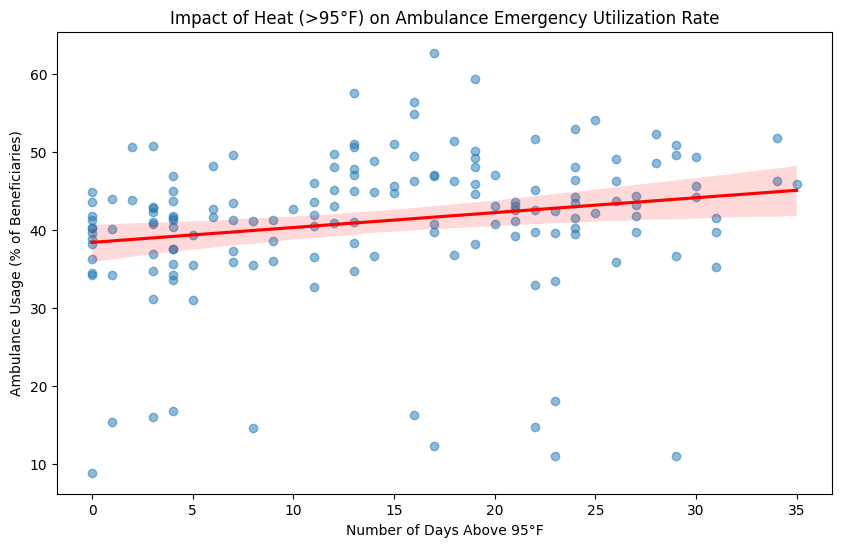

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='Days temp > 95', y='Ambulance_Emergency', data=df_final, 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Impact of Heat (>95°F) on Ambulance Emergency Utilization Rate')
plt.xlabel('Number of Days Above 95°F')
plt.ylabel('Ambulance Usage (% of Beneficiaries)')
plt.show()